
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [2]:
import pandas as pd
bank = pd.read_csv('./bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [ ]:
# Perform what ever steps you need to familiarize yourself with the data:

In [21]:
bank.shape

(4119, 21)

In [7]:
bank.age.value_counts().sort_index()

18     3
19     1
20     4
21     7
22    10
      ..
81     3
82     2
85     1
86     2
88     1
Name: age, Length: 67, dtype: int64

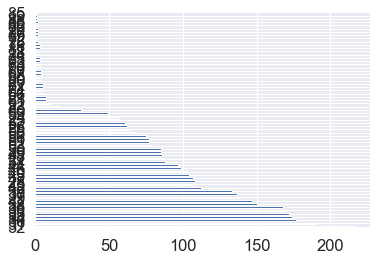

In [18]:

bank.age.value_counts().plot(kind='barh');



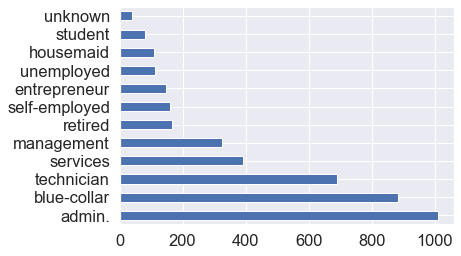

In [14]:
bank.job.value_counts().plot(kind='barh');
#There are unknowns in the job column 

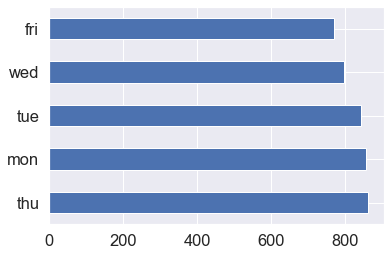

In [19]:
bank.day_of_week.value_counts().plot(kind='barh');

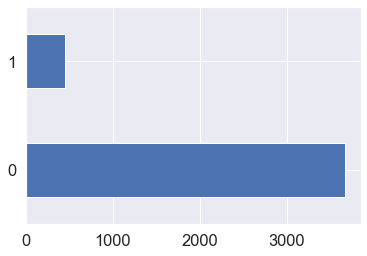

In [20]:
bank.y.value_counts().plot(kind='barh');

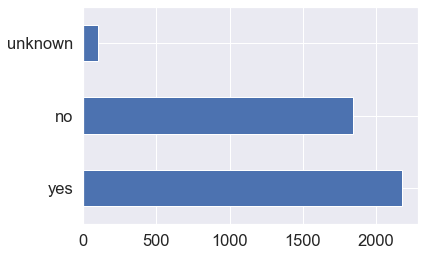

In [22]:
bank.housing.value_counts().plot(kind='barh');
#there are unknowns in the housing 

In [3]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000



## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [5]:
# A:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

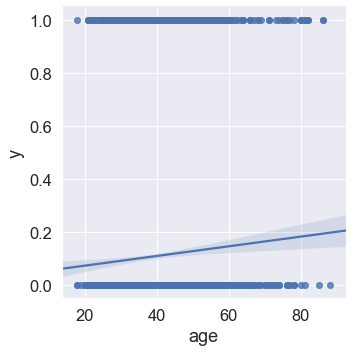

In [6]:
sns.lmplot(x='age', y='y', data=bank); 

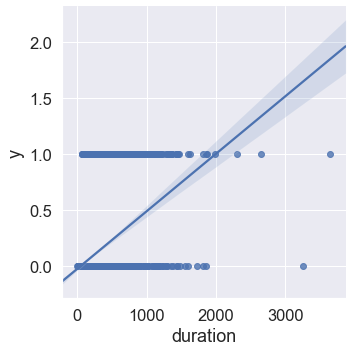

In [24]:
sns.lmplot(x='duration', y='y', data=bank); 

In [26]:
bank.housing.value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [30]:
#ANSWER: I think age coud be a factor, housing or duration. there are some unknowns in housing so I can assign those to 1

bank['housing2'] = bank['housing'].map({'unknown': 1, 'yes': 1, 'no': 0})

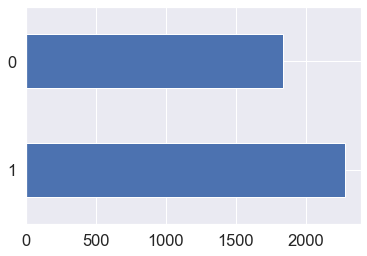

In [31]:
bank.housing2.value_counts().plot(kind='barh');


## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [36]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

**Build a Model**  

In [ ]:
# convert selected features to dummies

# set the model

# set x and y

# train test splot

# fit model

In [37]:
lr = LogisticRegression()

feature_cols = ['housing2', 'age', 'duration']
X = bank[feature_cols]
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .2)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
lr.intercept_

array([-3.91815388])

In [39]:
lr.coef_

array([[-0.09736103,  0.01451491,  0.00377462]])

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [40]:
# A: 
print((metrics.accuracy_score(y_pred, y_test)))

0.8871359223300971


### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [51]:
bank['loan2'] = bank['loan'].map({'unknown': 1, 'yes': 1, 'no': 0})

In [52]:
bank['marital2'] = bank['marital'].map({'unknown': 1, 'married': 1, 'single': 0})

In [53]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,update_housing,housing2,loan2,marital2
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,-1.8,92.893,-46.2,1.313,5099.1,0,1,1,0,1.0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.4,94.465,-41.8,4.962,5228.1,0,1,1,0,1.0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,1.4,94.465,-41.8,4.959,5228.1,0,1,1,1,1.0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,-0.1,93.200,-42.0,4.191,5195.8,0,1,1,0,1.0


In [ ]:
#I tried to use loan and marital switching them to binaries but it kept giving me an error 

In [54]:
# A;

lr2 = LogisticRegression()

feature_cols = ['nr.employed','euribor3m','cons.conf.idx']
X = bank[feature_cols]
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .2)

lr2.fit(X_train,y_train)
y_pred = lr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
print((metrics.accuracy_score(y_pred, y_test)))

0.8762135922330098




### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [56]:
# A:
lr2.predict_proba(X_test)

array([[0.83249441, 0.16750559],
       [0.96376193, 0.03623807],
       [0.84648976, 0.15351024],
       ...,
       [0.94153564, 0.05846436],
       [0.94676509, 0.05323491],
       [0.88812386, 0.11187614]])

**Visualize the distribution**

In [57]:
# A:
bank['y_pred_prob'] = lr.predict_proba(X)[:, 1]

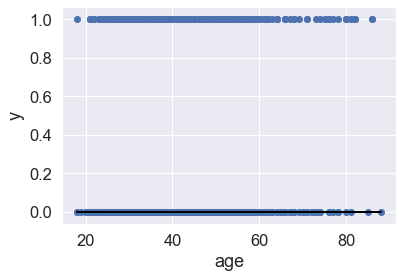

In [60]:
plt.scatter(bank.age, bank.y);
plt.plot(bank.age, bank.y_pred_prob, color='black');
plt.xlabel('age');
plt.ylabel('y');

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [ ]:
# A:

**Evaluate the model metrics now**

In [ ]:
# A:

## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [ ]:
# A:

## Bonus: Use Regularization to optimize your model.

In [ ]:
# try using a for loop to test various regularization strengths 'C'